# Masks : land-sea and relief

The aim of this notebook is to indicate how to read the data from masks. Two different masks are stored in a netCDF file:

* the **land-sea mask**, stored in the ```lsm``` field. The values are binary : 0 for sea and 1 for land.

* the **relief mask**, stored in the ```p3008``` field. The values are in meters.


The spatial resolution is 0.025°. 
These data are constant fields which come from the fine-mesh french weather model called 'AROME'. 

For more information about data, cf [documentation](https://meteofrance.github.io/meteonet/english/data/land-relief-masks/).

# Note

<font size="4.5">To use <span style="color:blue">**Cartopy**</span>, a library to plot data with basemaps (see cells below), it is necessary to <span style="color:red">activate the internet connection</span> of that notebook (in edit mode, you can find on the right column, in the *Settings* section, a row entitled *Internet*, put the slider bar on **on**).  </font>

<font size="4.5">If it does not still work, check you use the latest environment (in the *Settings* section, click on **Preferences**).</font>

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = "/kaggle/input/defi-ia-2022/Other/Other/NW_masks.nc"

In [3]:
data = xr.open_dataset(fname)

## Simple plots

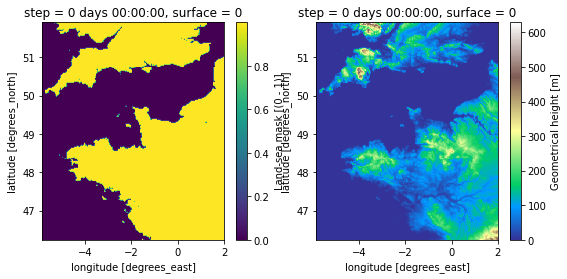

In [4]:
fig, axs = plt.subplots(1,2, figsize=(9,4))

# Plot the land-sea mask
data["lsm"].plot(ax=axs[0])

# Plot the relief mask
vmax = data["p3008"].values.max()
vmin = data["p3008"].values.min()

data["p3008"].plot(ax=axs[1], cmap='terrain', vmin=vmin, vmax=vmax)

plt.show()

In [5]:
data

<xarray.Dataset>
Dimensions:    (latitude: 227, longitude: 315)
Coordinates:
    step       timedelta64[ns] ...
    surface    int64 ...
  * latitude   (latitude) float64 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude  (longitude) float64 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
Data variables:
    lsm        (latitude, longitude) float32 ...
    p3008      (latitude, longitude) float32 -0.0001678 -0.0001678 ... 474.5
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-10-05T13:00:48 GRIB to CDM+CF via cfgrib-0....

In [6]:
coord = 'longitude'
data[coord]

<xarray.DataArray 'longitude' (longitude: 315)>
array([-5.842, -5.817, -5.792, ...,  1.958,  1.983,  2.008])
Coordinates:
    step       timedelta64[ns] 00:00:00
    surface    int64 0
  * longitude  (longitude) float64 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [7]:
data[coord].units

'degrees_east'

In [8]:
data[coord].values[0:10]

array([-5.842, -5.817, -5.792, -5.767, -5.742, -5.717, -5.692, -5.667,
       -5.642, -5.617])

In [9]:
data['lsm']

<xarray.DataArray 'lsm' (latitude: 227, longitude: 315)>
array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.999991, 0.999991, 0.999991],
       [0.      , 0.      , 0.      , ..., 0.999991, 0.999991, 0.999991],
       [0.      , 0.      , 0.      , ..., 0.999991, 0.999991, 0.999991]],
      dtype=float32)
Coordinates:
    step       timedelta64[ns] 00:00:00
    surface    int64 0
  * latitude   (latitude) float64 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude  (longitude) float64 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
Attributes: (12/28)
    GRIB_paramId:                             172
    GRIB_shortName:                           lsm
    GRIB_units:                               (0 - 1)
    GRIB_name:                                Land-sea mask
    GRIB_cfName:                              land_binary_mask
    GRIB_cfVarName:                           lsm
    ...                                       ...
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   51.896
    GRIB_latitudeOfLastGridPointInDegrees:    46.246
    long_name:                                Land-sea mask
    units:                                    (0 - 1)
    standard_name:                            land_binary_mask

## Plotting the masks with Cartopy

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
# Coordinates of studied area boundaries (in °N and °E)
lllat = 46.25  #lower left latitude
urlat = 51.896  #upper right latitude
lllon = -5.842  #lower left longitude
urlon = 2  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


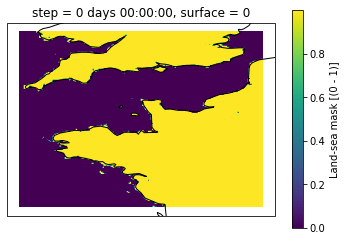

In [12]:
fig = plt.figure()

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
data["lsm"].plot()

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Adjust the plot to the area we defined 
#/!\# this line causes a bug of the kaggle notebook and clears all the memory. That is why this line is commented and so
# the plot is not completely adjusted to the data
# Show only the area we defined
#ax.set_extent(extent)

plt.show()

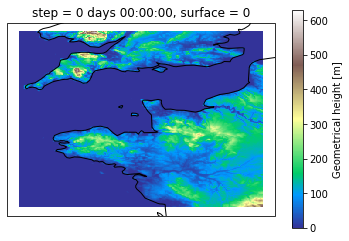

In [13]:
fig = plt.figure()

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
vmax = data["p3008"].values.max()
vmin = data["p3008"].values.min()
data["p3008"].plot(cmap='terrain', vmin=vmin, vmax=vmax)

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Adjust the plot to the area we defined 
#/!\# this line causes a bug of the kaggle notebook and clears all the memory. That is why this line is commented and so
# the plot is not completely adjusted to the data
# Show only the area we defined
#ax.set_extent(extent)

plt.show()